In [3]:
%matplotlib inline

import sys, os, math
import numpy as np
import scipy
import glob
from collections import defaultdict
#import datetime
#import matplotlib as mpl
#matplotlib.use('TkAgg', force=True)
import matplotlib.pyplot as plt
#assert matplotlib.get_backend() == 'TkAgg'

In [4]:
from mpl_toolkits.basemap import Basemap
from descartes import PolygonPatch
from shapely.geometry import Polygon
from matplotlib.patches import Ellipse

from netCDF4 import Dataset as NCDataset
from obspy.core import Stream, UTCDateTime
#assert matplotlib.get_backend() == 'TkAgg', matplotlib.get_backend()

In [5]:
package_root = os.path.abspath('../../..')
if package_root not in sys.path:
    sys.path.append(package_root)
from seismic.xcorqc.correlator import Dataset

#import matplotlib.dates as mdates
from textwrap import wrap
import gc
#assert matplotlib.get_backend() == 'TkAgg', matplotlib.get_backend()

In [6]:
from analytic_plot_utils import distance, drawBBox

In [7]:
#assert matplotlib.get_backend() == 'TkAgg', matplotlib.get_backend()

In [8]:
import ipdb

In [9]:
CORR_PATH = '/g/data/ha3/rakib/xcorTest/7G/'

In [10]:
ds = Dataset('/g/data/ha3/Passive/_ANU/7G(2013-2015)/ASDF/7G(2013-2015).h5')
#ds = Dataset('/g/data/ha3/Passive/_ANU/7X(2009-2011)/ASDF/7X(2009-2011).h5')
corrFiles = glob.glob(CORR_PATH + '/*.nc')

/home/547/am7399/venv/py3.5.2/lib/python3.5/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [17]:
dir(ds)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cart_location',
 '_data_path',
 '_earth_radius',
 '_tree',
 'ds',
 'ds_jason_db',
 'echannel',
 'get_closest_stations',
 'has_jason_db',
 'nchannel',
 'stations',
 'stations_metadata',
 'zchannel']

In [22]:
ds.ds

ASDF file [format version: 1.0.0]: '../../../../../../../../data/ha3/Passive/_ANU/7G(2013-2015)/ASDF/7G(2013-2015).h5' (197.9 GB)
	Contains 0 event(s)
	Contains waveform data from 44 station(s).
	Contains 1 type(s) of auxiliary data: LogfileData

In [29]:
ds.nchannel, ds.echannel, ds.zchannel

('BHN', 'BHE', 'BHZ')

In [28]:
ds.stations_metadata

defaultdict(list,
            {'CI43': Contents of the data set for station 7G.CI43:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording,
             'CI45': Contents of the data set for station 7G.CI45:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording,
             'CJ47': Contents of the data set for station 7G.CJ47:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording,
             'CK40': Contents of the data set for station 7G.CK40:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording,
             'CK41': Contents of the data set for station 7G.CK41:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording,
             'CK42': Contents of the data set for station 7G.CK42:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording,
             'CK43': Contents of the data set for station 7G.CK43:
    - Has a StationXML file
    - 1 Waveform Tag(s):
    

In [30]:
ds.stations_metadata.keys()

dict_keys(['CQ40', 'CK45', 'CK42', 'CR40', 'CI43', 'CL45', 'CQ41', 'CL42', 'CN45', 'CI45', 'CQ44', 'CP40', 'CN43', 'CN44', 'CN42', 'CM40', 'CR45', 'CL44', 'CP45', 'CK43', 'CJ47', 'CM42', 'CK41', 'CM46', 'CL40', 'CL46', 'CR41', 'CO46', 'CK44', 'CN41', 'CP42', 'CR43', 'CQ46', 'CM44', 'CQ45', 'CP41', 'CM45', 'CK40', 'CQ43', 'CP43', 'CM43', 'CP44', 'CN40', 'CQ42'])

In [31]:
ds.stations_metadata['CQ40']

Contents of the data set for station 7G.CQ40:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        raw_recording

In [37]:
dir(ds.stations_metadata['CQ40'])

['StationXML',
 '_WaveformAccessor__data_set',
 '_WaveformAccessor__delete_data',
 '_WaveformAccessor__filter_data',
 '_WaveformAccessor__get_coordinates',
 '_WaveformAccessor__hdf5_group',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_repr_pretty_',
 '_station_name',
 'channel_coordinates',
 'coordinates',
 'filter_waveforms',
 'get_item',
 'get_waveform_attributes',
 'get_waveform_tags',
 'list',
 'raw_recording']

centre: 143.330734, -29.030768


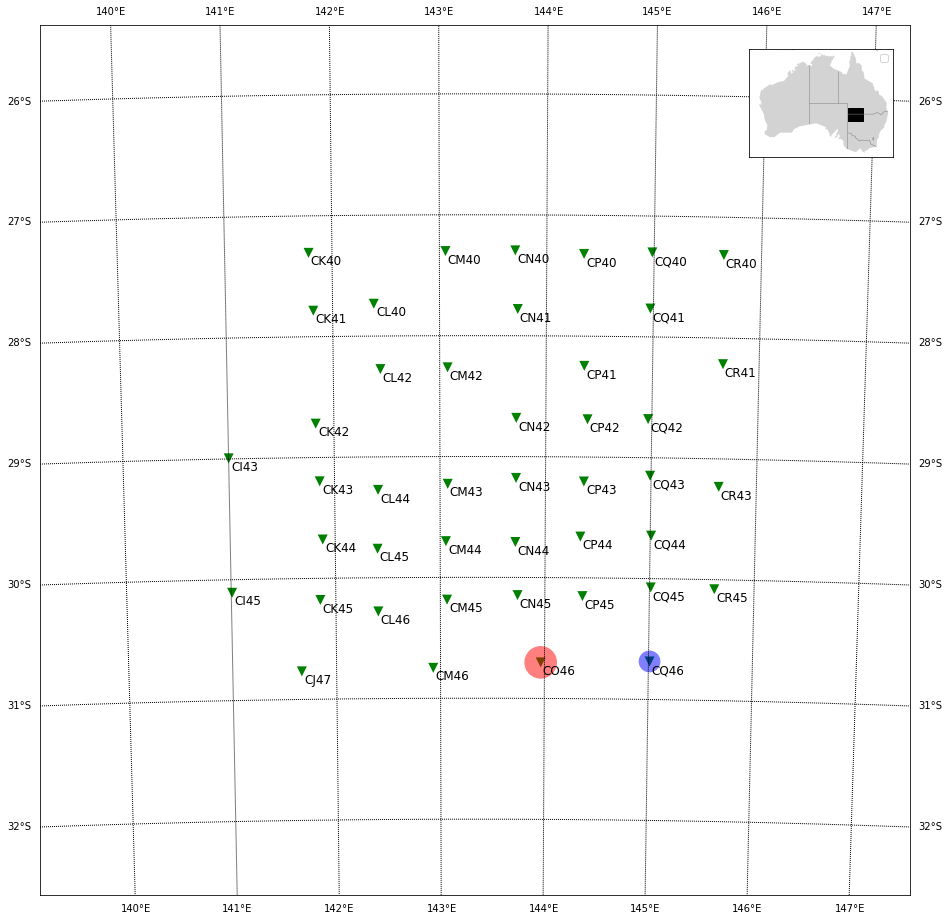

In [15]:
fig = plt.figure(figsize=(16,16))

minLon = 1e32
maxLon = -1e32
minLat = 1e32
maxLat = -1e32
for s in ds.stations:
    lon,lat = ds.stations_metadata[s].coordinates['longitude'], \
              ds.stations_metadata[s].coordinates['latitude']
    
    minLon = min(lon, minLon)
    maxLon = max(lon, maxLon)
    minLat = min(lat, minLat)
    maxLat = max(lat, maxLat)
# end for

m = Basemap(width=800000,height=800000,projection='lcc',
            resolution='l',lat_1=minLat,lat_2=maxLat,
            lat_0=(minLat+maxLat)/2., lon_0=(minLon + maxLon)/2.)
# draw coastlines.
m.drawcoastlines()

#draw grid
parallels = np.linspace(np.floor(minLat)-5, np.ceil(maxLat)+5, \
                        int((np.ceil(maxLat)+5) - (np.floor(minLat)-5))+1)
m.drawparallels(parallels,labels=[True,True,False,False])
meridians = np.linspace(np.floor(minLon)-5, np.ceil(maxLon)+5, \
                        int((np.ceil(maxLon)+5) - (np.floor(minLon)-5))+1)
m.drawmeridians(meridians,labels=[False,False,True,True])

# plot stations
for s in ds.stations:
    lon,lat = ds.stations_metadata[s].coordinates['longitude'], \
              ds.stations_metadata[s].coordinates['latitude']

    px,py = m(lon, lat)
    pxl,pyl = m(lon+0.02, lat-0.1)
    marker_size = 100
    m.scatter(px, py, marker_size, marker='v', c='g', edgecolor='none')    
    plt.annotate(s, xy=(pxl, pyl), fontsize=12)
# end for

for fn in corrFiles:
    pair = os.path.basename(fn)
    station = pair.split('.')[0]
    if(station != 'CO46'): 
        continue
    
    nbrs = []
    for nfn in corrFiles:
        npair = os.path.basename(nfn)
        nstation = npair.split('.')[0]
        
        if(nstation in station): 
            nbrs.append(npair.split('.')[1])
    # end for
    
    lon,lat = ds.stations_metadata[station].coordinates['longitude'], \
              ds.stations_metadata[station].coordinates['latitude']    
    e = Ellipse(m(lon, lat), 3e4, 3e4, color='red', ec='none', alpha=0.5)
    fig.axes[0].add_artist(e)
    
    for nbr in nbrs:
        if(nbr != 'CQ46'): 
            continue
        lon,lat = ds.stations_metadata[nbr].coordinates['longitude'], \
                  ds.stations_metadata[nbr].coordinates['latitude']    
        e = Ellipse(m(lon, lat), 2e4, 2e4, color='blue', ec='none', alpha=0.5)
        fig.axes[0].add_artist(e)
    # end for
    
    break
# end for


insetAx = fig.add_axes([0.75,0.75,0.125,0.125])
mInset = Basemap(resolution='c', # c, l, i, h, f or None
            ax=insetAx,
            projection='merc',
            lat_0=-20, lon_0=132,
            llcrnrlon=110, llcrnrlat=-40, urcrnrlon=155, urcrnrlat=-10)
#mInset.drawcoastlines()
mInset.fillcontinents(color='lightgray')
mInset.drawstates(color="grey")

drawBBox(minLon, minLat, maxLon, maxLat, mInset, fill='True', facecolor='k')

print('centre: %lf, %lf'%(np.mean([minLon, maxLon]), np.mean([minLat, maxLat])))

#assert matplotlib.get_backend() == 'TkAgg', matplotlib.get_backend()
plt.legend()
plt.show()

In [ ]:

for fn in corrFiles:
    fig, ax = plt.subplots(1, 2, figsize=(16,16))
    pair = os.path.basename(fn)
    station = pair.split('.')[0]
    
    #station = 'CO46'
    
    nbrs = []
    for nfn in corrFiles:
        npair = os.path.basename(nfn)
        nstation = npair.split('.')[0]
        
        if(nstation in station): 
            nbrs.append(npair.split('.')[1])
    # end for
    
   
    fn = CORR_PATH + '/%s.%s.nc'%(station, nbrs[1])

    d = NCDataset(fn, 'r')
    
    sTimes = d.variables['IntervalStartTimes'][:]
    lag = d.variables['lag'][:]
    xcorr = d.variables['xcorr'][:, :]
    
    #xcorr = np.ma.masked_array(xcorr, mask=xcorr==0)
    
    dlag = 12000
    gx, gy = np.meshgrid(lag[lag.shape[0]/2-dlag:lag.shape[0]/2+dlag+1], sTimes)
    
   
    labels=[]
    for st in sTimes: 
        labels.append(UTCDateTime(st).strftime("%y-%m-%d"))
    
    plt.pcolormesh(gx, gy, xcorr[:, lag.shape[0]/2-dlag:lag.shape[0]/2+dlag+1], 
                   cmap='RdBu', vmin=0, vmax=1)
    plt.yticks(sTimes[::7], labels[::7])
    
    t = np.array(sTimes)
    g = np.gradient(t)
    indices = np.argwhere(g > (np.mean(g) + 2*np.std(g)))
    
    for i, idx in enumerate(indices[::2]):
        bx = np.array([np.min(gx), np.max(gx), np.max(gx), np.min(gx), np.min(gx)])
        by = np.array([sTimes[idx], sTimes[idx], sTimes[indices[i+1]], sTimes[indices[i+1]], sTimes[idx]])
    
        xy = zip(bx,by)
        poly = Polygon(xy)
        fig.axes[0].add_patch(PolygonPatch(poly, facecolor='white', ec='red'))
    # end for
    
    plt.colorbar()
    #fig.axes[0].get_xaxis().set_visible(False)
    #fig.axes[0].get_yaxis().set_visible(False)    
    #for spine in plt.gca().spines.values(): spine.set_visible(False)    
    plt.show()
    
    plt.close()
    plt.plot(gx[0, :], np.mean(xcorr[:, lag.shape[0]/2-dlag:lag.shape[0]/2+dlag+1], axis=0))
    plt.show()
    d.close()    
    break
# end for


In [ ]:
ax = plt.subplot()

t = np.array(sTimes)
#t[50:] = t[50:]+1e6

g = np.gradient(t)
ax.plot(t)
#ax.plot(scipy.signal.detrend(t))
#ax.plot(g)

indices = np.argwhere(g > (np.mean(g) + 2*np.std(g)))

print t[indices]

print indices[::2]

#ax.plot(np.gradient(sTimes))

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1)

fig.set_size_inches(10, 10)
for fn in corrFiles:
    pair = os.path.basename(fn)
    station = pair.split('.')[0]
    
    station = 'CO46'

    nbrs = []
    for nfn in corrFiles:
        npair = os.path.basename(nfn)
        nstation = npair.split('.')[0]
        
        if(nstation in station): nbrs.append(npair.split('.')[1])
    # end for
    
    fn = CORR_PATH+'/%s.%s.nc'%(station, nbrs[1])
    print fn 
    d = NCDataset(fn, 'r')
    
    sTimes = d.variables['IntervalStartTimes'][:]
    lag = d.variables['lag'][:]
    xcorr = d.variables['xcorr'][:, :]
    
    xcorr = np.ma.masked_array(xcorr, mask=xcorr==0)
        
    xcorr = xcorr[:, lag.shape[0]/2-600:lag.shape[0]/2+601]
    lag = lag[lag.shape[0]/2-600:lag.shape[0]/2+601]

    print np.min(xcorr), np.max(xcorr)
    
    maxCorrLags = np.zeros_like(sTimes)
    for i in range(len(sTimes)):
        if(np.ma.is_masked(xcorr[i, :])):
            maxCorrLags[i] = -999
        else:
            maxCorrLags[i] = lag[np.argmax(xcorr[i, :])]
    # end for
    
    ax1.plot(sTimes[maxCorrLags!=-999], maxCorrLags[maxCorrLags!=-999])
    
    ax1.set_ylim(-60, 60)
    
    ax2.hist(maxCorrLags[maxCorrLags!=-999], bins=len(sTimes), edgecolor='none')
    
    print gx.shape
    print xcorr.shape
    
    plt.savefig('./b.png', dpi=300)
    d.close()    
    break
# end for